## Import Libraries

In [ ]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# For display
%matplotlib inline

# Setting format for not to display in scientific notation 
pd.options.display.float_format = '{:.2f}'.format

## Load the Pre-Processed data

In [2]:
raw_df = pd.read_csv("PreProcessed.csv")

In [3]:
raw_df.shape

(42185, 196)

## Eploring the dataset

In [4]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,actual_time_to_travel,time_taken_sofar
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,10.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,61.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,81.00


### Explore the response variable: Actual time to travel between the bus stops

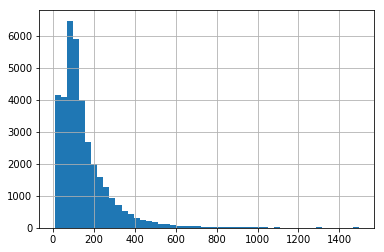

In [5]:
# Plot the historam
raw_df['actual_time_to_travel'].hist(bins = 50)

In [6]:
raw_df['actual_time_to_travel'].describe()

count   36566.00
mean      149.20
std       141.02
min         9.00
25%        70.00
50%       110.00
75%       189.00
max      1495.00
Name: actual_time_to_travel, dtype: float64

In [7]:
# Check for Null Values
raw_df['actual_time_to_travel'].hasnans

True

In [8]:
# Drop Nan values
filtered_df = raw_df.dropna(subset=['actual_time_to_travel'])

In [9]:
filtered_df.shape

(36566, 196)

### Split into Train and Test datasets

In [10]:
X = filtered_df.loc[:,filtered_df.columns != 'actual_time_to_travel']
Y = filtered_df.actual_time_to_travel

In [11]:
X.shape

(36566, 195)

In [12]:
Y.shape

(36566,)

In [72]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [73]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,time_taken_sofar
1964,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2181.00
29453,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4831.00
14442,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1922.00
20591,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1196.00
39011,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1584.00


### Standardize The Data

In [74]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### Build the model

In [75]:
def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [76]:
X_train.shape

(27424, 195)

In [109]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer: Same as input_dim with additional one for the bias term 
model.add(Dense(256, activation='relu', input_dim=195))

# Add one hidden layer: One hidden layer is sufficient for majority of the problems
# The optimal size of the hidden layer is usually between the size of the input and size of the output layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='linear'))

In [114]:
# Compile and fit the model
model.compile(optimizer='Adadelta',
              loss='mean_squared_error')

BATCH_SIZE = 128
EPOCHS = 50

history = model.fit(
    X_train, Y_train,
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_data=(X_test,Y_test),
    verbose=1)

Train on 27424 samples, validate on 9142 samples
Epoch 1/50
27424/27424 [==============================] - 2s 70us/step - loss: 6059.7903 - val_loss: 28212.8097
Epoch 2/50
27424/27424 [==============================] - 1s 51us/step - loss: 5856.0499 - val_loss: 27101.8420
Epoch 3/50
27424/27424 [==============================] - 1s 51us/step - loss: 5578.2037 - val_loss: 25345.9063
Epoch 4/50
27424/27424 [==============================] - 1s 50us/step - loss: 5453.6020 - val_loss: 24685.3463
Epoch 5/50
27424/27424 [==============================] - 1s 51us/step - loss: 5303.3863 - val_loss: 24295.6396
Epoch 6/50
27424/27424 [==============================] - 1s 51us/step - loss: 5235.1181 - val_loss: 26362.0369
Epoch 7/50
27424/27424 [==============================] - 1s 50us/step - loss: 5118.2377 - val_loss: 26899.9012
Epoch 8/50
27424/27424 [==============================] - 1s 51us/step - loss: 5016.4877 - val_loss: 25065.7264
Epoch 9/50
27424/27424 [==============================]

In [115]:
from sklearn.metrics import r2_score

Y_pred_train = model.predict(X_train)
r2Score = r2_score(Y_train, Y_pred_train) 
print('Train R-Square:',r2Score)

Y_pred_test = model.predict(X_test)
r2Score = r2_score(Y_test, Y_pred_test) 
print('Test R-Square:',r2Score)

Train R-Square: 0.925656893231
Test R-Square: -0.598702586612


In [116]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

print('Train MSE:',mse_train)
print('Test MSE:',mse_test)

Train MSE: 1500.29630162
Test MSE: 30385.8484008


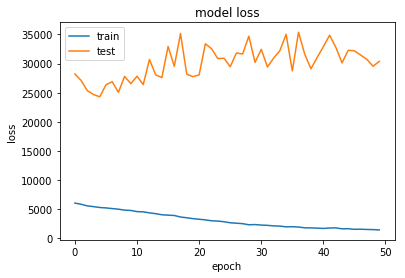

In [117]:
plot_train_val_loss(history.history)

### Building  models

In [120]:
print('Features:',X.shape, 'Response:',Y.shape)

Features: (36566, 195) Response: (36566,)


In [121]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '185', '186', '187', '188', '189', '190', '191', '192', '193',
       'time_taken_sofar'],
      dtype='object', length=195)